# Customer churn Prediction using ANN

## Loading the data

In [1]:
import pandas as pd
data = pd.read_csv(r"C:\Users\rezaa\Desktop\archive\Churn_Modelling.csv")
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Checking if there is any null value

In [2]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


## Checking if there is any duplicated data

In [4]:
data.duplicated().sum()

0

In [5]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

## Deleting less important columns

In [6]:
data.drop(labels=['RowNumber', 'CustomerId', 'Surname'],axis = 1,inplace=True)

In [7]:
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


## Converting categorical to numarical value using one hot encoding

In [8]:
data = pd.get_dummies(data, columns = ['Geography','Gender'],drop_first = True,dtype='int')

In [9]:
data

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [10]:
X = data.drop(columns=['Exited']).values
y = data.loc[:,'Exited'].values

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20,random_state = 0)


# ANN model building

## First create a Sequential object. This contains all the nodes

In [13]:
from tensorflow.keras import Sequential
model = Sequential()

## In the squectial object add layers using Dense object

In [14]:
from tensorflow.keras.layers import Dense
model.add(Dense(11,activation='sigmoid',input_dim=11,name='layer_1'))
model.add(Dense(11,activation='sigmoid',name='layer_2'))
model.add(Dense(1,activation='sigmoid',name='output_layer'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer_1 (Dense)             (None, 11)                132       
                                                                 
 layer_2 (Dense)             (None, 11)                132       
                                                                 
 output_layer (Dense)        (None, 1)                 12        
                                                                 
Total params: 276
Trainable params: 276
Non-trainable params: 0
_________________________________________________________________


## Using compile method to add loss function, optimizer for sgd and metrics to print during training

In [16]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [17]:
history = model.fit(X_train,y_train,epochs=100,validation_split=0.20,verbose=1)

Epoch 1/100
200/200 [==============================] - 1s 4ms/step - loss: 1.0247 - accuracy: 0.2150 - val_loss: 0.6899 - val_accuracy: 0.5600
Epoch 2/100
200/200 [==============================] - 1s 3ms/step - loss: 0.5925 - accuracy: 0.7866 - val_loss: 0.5328 - val_accuracy: 0.7969
Epoch 3/100
200/200 [==============================] - 1s 3ms/step - loss: 0.5130 - accuracy: 0.7958 - val_loss: 0.4986 - val_accuracy: 0.7969
Epoch 4/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4931 - accuracy: 0.7958 - val_loss: 0.4869 - val_accuracy: 0.7969
Epoch 5/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4832 - accuracy: 0.7958 - val_loss: 0.4783 - val_accuracy: 0.7969
Epoch 6/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4745 - accuracy: 0.7958 - val_loss: 0.4700 - val_accuracy: 0.7969
Epoch 7/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4656 - accuracy: 0.7958 - val_loss: 0.4614 - val_accuracy: 0.7969

In [18]:
y_pred = model.predict(X_test)

63/63 [==============================] - 0s 2ms/step


In [20]:
import numpy as np
y_pred_modified = np.where(y_pred < 0.5, 0 , 1)

In [21]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_modified)

0.8525

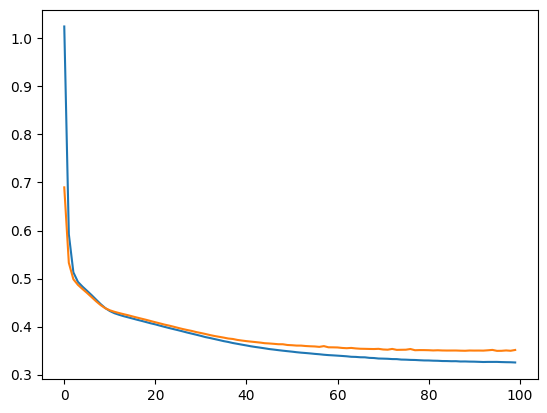

In [22]:
import matplotlib.pyplot as plt
plt.plot(range(len(history.history['loss'])),history.history['loss'],range(len(history.history['val_loss'])),history.history['val_loss'])

In [28]:
import os
os.pwd

AttributeError: module 'os' has no attribute 'pwd'